In [232]:
from scipy.io import loadmat
import numpy as np
import random
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
_,_,_,X_trn_data1, X_tst_data1, Y_trn_data1, Y_tst_data1 = loadmat('data/data1.mat').values()
_,_,_,X_trn_data2, X_tst_data2, Y_trn_data2, Y_tst_data2 = loadmat('data/data2.mat').values()

In [16]:
X_trn_data1

array([[-0.21960675,  2.04150088],
       [-0.45609595,  2.19649402],
       [-0.13034716,  2.31263631],
       [-0.69959617,  1.77872591],
       [-1.18058501,  1.84663797],
       [-0.78022195,  2.32244363],
       [-1.24254811,  2.40930788],
       [-0.25822186,  2.68765097],
       [-1.88239904,  0.9940371 ],
       [-0.69059205,  2.68696191],
       [-1.05495953,  1.79145031],
       [-0.7655312 ,  1.30831083],
       [-1.21219725,  1.61894587],
       [-1.3729345 ,  1.82506057],
       [-1.39594678,  1.72936336],
       [-0.55621279,  2.51395698],
       [-0.77021839,  2.82363367],
       [-0.73486343,  2.5674805 ],
       [-1.95820693,  1.93780788],
       [-0.40320066,  2.36866915],
       [-1.44186703,  2.35285039],
       [-0.17345247,  2.74756692],
       [-0.81170653,  1.25389359],
       [-1.59775015,  1.54701666],
       [-1.95841726,  1.12652755],
       [-0.90749799,  1.59823366],
       [-0.80568541,  0.93823088],
       [-1.37873673,  1.70917734],
       [-1.29623358,

## Logistic Function Classifier

In [278]:
#Logistic Regression
class LogisticRegression():
    def __init__(self):
        return None
    
    def train(self,X,Y,eta,m,lambda_):
        X_copy = np.copy(X) #create a copy of the data
        X_copy = np.array([np.append(x,[1]) for x in X_copy])
        for i in range(len(X_copy[0])):
            #for all col i in X get the mean and standard deviation
            col=np.array([[X_copy[j][i]] for j in range(len(X_copy))])
            col_mean=np.mean(col) 
            col_std = np.std(col)
            for j in range(len(X_copy)):
                if col_std!=0:
                    X_copy[j][i]=(X_copy[j][i]-col_mean)/col_std #scale data to prevent theta overflow
        
        epsilon = 10**-3
        theta = np.array(np.array([np.array([float(0)])]*len(X_copy[0])))
        gradient = np.array(np.array([np.array([10])]*len(X_copy[0])))
        while np.sum(gradient)>=epsilon:
            gradient = np.reshape(np.array(eta*np.sum(np.array([X_copy[i]*(Y[i]-(1/(1+np.exp(np.dot(-theta.T,X_copy[i]))))) - lambda_*2*np.sum(theta) for i in range(len(X_copy))]),axis=0)),newshape=(3,1))
            theta += gradient
        return theta

    def test(self,X,theta):
        X_copy = np.copy(X) #create a copy of the data
        X_copy = np.array([np.append(x,[1]) for x in X_copy])
        for i in range(len(X_copy[0])):
            #for all col i in X get the mean and standard deviation
            col=np.array([[X_copy[j][i]] for j in range(len(X_copy))])
            col_mean=np.mean(col) 
            col_std = np.std(col)
            for j in range(len(X_copy)):
                if col_std!=0:
                    X_copy[j][i]=(X_copy[j][i]-col_mean)/col_std #scale data to prevent theta overflow
                else:
                    X_copy[j][i]-(X_copy[j][i]-col_mean)
        y_prob = np.dot(X_copy,theta)
        y_pred = np.array([[1 if p>0 else 0 for p in x] for x in y_prob])
        return y_pred

## Functions

In [284]:
#classification error
def classificationError(y_pred,y_true):
    wrong = 0
    total = len(y_true)
    for i in range(len(y_pred)):
        if y_pred[i]!=y_true[i]:
            wrong+=1
    return wrong/total

#grid search
def gridSearch(X_trn, Y_trn, X_tst, Y_tst,params):
    combinations = list(itertools.product(list(params.values())[0],list(params.values())[1]))
    error = 1000
    for comb in combinations:
        model = LogisticRegression()
        theta = model.train(X_trn,Y_trn,comb[0],_,comb[1])
        y_pred = model.test(X_tst,theta)
        temp = classificationError(y_pred,Y_tst)
        if error>= temp:
            error = temp
            best_lambda = comb[1]
            best_eta = comb[0]
    return best_eta, best_lambda
    

#K Fold Cross-Validation
def kFoldCV(k,X,Y):
    random.seed(141)
    indices = list(range(len(X)))
    random.shuffle(indices)
    X_copy=np.copy(X)[indices]
    Y_copy=np.copy(Y)[indices]
    lenPartitions = len(X_copy)//k
    best_params = []
    for part in range(k):
        start = part*lenPartitions
        end = (part+1)*lenPartitions
        holdOutIndices = list(range(start,end)) 
        restIndices = list(set(range(len(X_copy))).difference(set(holdOutIndices)))
        X_train = X_copy[restIndices]
        Y_train = Y_copy[restIndices]
        X_test = X_copy[holdOutIndices]
        Y_test = Y_copy[holdOutIndices]
        best_params.append(gridSearch(X_train,Y_train,X_test,Y_test,{'learning_rate':[0.01,0.02,0.03],'lambda':[.1,.2,.3]}))
    avgEta = np.mean([x[0] for x in best_params])
    avgLambda = np.mean([x[1] for x in best_params])
    return avgEta, avgLambda

#decision boundary
def decisionBounary(X,theta):
    plt.figure()
    X_copy = np.copy(X) #create a copy of the data
    X_copy = np.array([np.append(x,[1]) for x in X_copy])
    for i in range(len(X_copy[0])):
        #for all col i in X get the mean and standard deviation
        col=np.array([[X_copy[j][i]] for j in range(len(X_copy))])
        col_mean=np.mean(col) 
        col_std = np.std(col)
        for j in range(len(X_copy)):
            if col_std!=0:
                X_copy[j][i]=(X_copy[j][i]-col_mean)/col_std #scale data to prevent theta overflow
    class_ = np.array([[1 if p>0 else 0 for p in x] for x in np.dot(X_copy,theta)])
    class_ = [x[0] for x in class_]
    xAxis1 = [X_copy[i][0] for i in range(len(X_copy)) if class_[i]==1]
    yAxis1 = [X_copy[i][1] for i in range(len(X_copy)) if class_[i]==1]
    xAxis0 = [X_copy[i][0] for i in range(len(X_copy)) if class_[i]==0]
    yAxis0 = [X_copy[i][1] for i in range(len(X_copy)) if class_[i]==0]
    x=np.linspace(-2,2)
    y= -(theta[0]/theta[1])*x + (theta[2]/theta[1])
    plt.scatter(xAxis1,yAxis1, marker='*')
    plt.scatter(xAxis0,yAxis0,marker='+')
    plt.plot(x,y,'k-')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('Decision Boundary for Logistic Regression')

## Dataset 1 Logistic Regression

Classification Error:  0.0


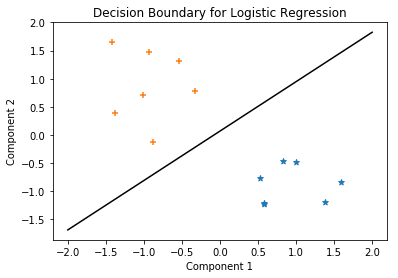

In [286]:
eta,lambda_ = kFoldCV(3,X_trn_data1,Y_trn_data1)
model = LogisticRegression()
theta = model.train(X_trn_data1,Y_trn_data1,eta,_,lambda_)
y_pred = model.test(X_tst_data1,theta)
print('Classification Error: ', classificationError(y_pred,Y_tst_data1))
decisionBounary(X_tst_data1,theta)

## Dataset 2 Logistic Regression

Classification Error:  0.07142857142857142


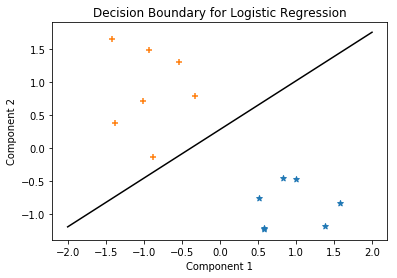

In [288]:
eta,lambda_ = kFoldCV(3,X_trn_data2,Y_trn_data2)
model = LogisticRegression()
theta = model.train(X_trn_data2,Y_trn_data2,eta,_,lambda_)
y_pred = model.test(X_tst_data2,theta)
print('Classification Error: ', classificationError(y_pred,Y_tst_data2))
decisionBounary(X_tst_data1,theta)